# MODELING

In [140]:
    #import the packages that I will need for the projects
import pandas as pd
import pyreadstat as prs #in order to read SPSS files
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_curve, roc_auc_score,r2_score, mean_squared_error  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from mpl_toolkits import mplot3d
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [141]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [142]:
    #Read the data with the labels in csv format
data = pd.read_csv('W35_May18/ATP W35_modeling_dataset.csv',index_col='Unnamed: 0')

In [143]:
print(data.shape)
data.head()

(4193, 49)


,Computer_Decisions,Trust_Major_Tech,Impact_Tech,Ethics_Company,Regulation_Gvt,Gender_view_Tech,Use_Facebook,Use_Twitter,Use_Instagram,Use_YouTube,...,religion__4.0,religion__5.0,religion__6.0,religion__6.5,religion__7.0,religion__8.0,religion__9.0,religion__10.0,religion__11.0,religion__12.0
0,1.0,3.0,1.0,3.0,3.0,3.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,3.0,1.0,2.0,3.0,3.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,3.0,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
5,2.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
#seperate dependent variables and other features
target = data['Computer_Decisions']
features = data.drop(['Computer_Decisions'], axis=1)

### TEST TRAIN SPLIT

In [145]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [146]:
#Checking the lenght of the training and testing set
print(len(X_train),len(X_test),len(y_train),len(y_test))

3354 839 3354 839


In [147]:
#scale data
sc=StandardScaler()
#scale both training and testing set
X_train_scaled= pd.DataFrame(sc.fit_transform(X_train),columns=features.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=features.columns)

In [148]:
X_train_scaled.head()

,Trust_Major_Tech,Impact_Tech,Ethics_Company,Regulation_Gvt,Gender_view_Tech,Use_Facebook,Use_Twitter,Use_Instagram,Use_YouTube,Use_Snapchat,...,religion__4.0,religion__5.0,religion__6.0,religion__6.5,religion__7.0,religion__8.0,religion__9.0,religion__10.0,religion__11.0,religion__12.0
0,-1.295384,-0.507807,0.553062,-0.916275,0.863062,0.514496,-0.578957,-0.688684,0.621710,-0.452005,...,-0.079377,-0.186724,-0.096586,-0.051871,-0.090086,-0.088388,-0.268157,-0.278240,-0.177103,-0.411155
1,0.231489,-0.507807,0.553062,-0.916275,0.863062,0.514496,1.727244,-0.688684,0.621710,-0.452005,...,-0.079377,-0.186724,-0.096586,-0.051871,-0.090086,-0.088388,-0.268157,-0.278240,-0.177103,-0.411155
2,0.231489,-0.507807,0.553062,1.180032,0.863062,-1.943651,-0.578957,1.452045,-1.608467,2.212363,...,-0.079377,-0.186724,-0.096586,-0.051871,-0.090086,-0.088388,-0.268157,-0.278240,-0.177103,2.432173
3,1.758363,-0.507807,0.553062,-0.916275,-1.264619,0.514496,1.727244,1.452045,0.621710,2.212363,...,-0.079377,-0.186724,-0.096586,-0.051871,-0.090086,-0.088388,-0.268157,3.594025,-0.177103,-0.411155
4,0.231489,-0.507807,0.553062,-0.916275,-1.264619,-1.943651,-0.578957,-0.688684,0.621710,-0.452005,...,-0.079377,-0.186724,-0.096586,-0.051871,-0.090086,-0.088388,-0.268157,-0.278240,-0.177103,-0.411155


* ### HELPERS

In [149]:
def print_metrics(labels, preds):
    
    """ print out the evaluation metrics for the test predictions stored in test_preds """
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [150]:
def performance(y_true, y_predict):
    
    """ Helper function to calculate the evaluation Metric """
    
    score = f1_score(y_true,y_predict)
    # Return the score
    return score

In [151]:
def plot_feature_importances(model):
    
    """ Function to show the most important features"""
    n_features = X_train_scaled.shape[1]
    figsize=(30,12)
    
    feat_imp = pd.DataFrame({'importance': model.feature_importances_})    
    feat_imp['feature'] = X_train_scaled.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:n_features]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    
    feat_imp.plot.barh(align='center',figsize=figsize) 
    plt.yticks(np.arange(n_features), X_train_scaled.columns.values) 
    plt.title("Representation of features importance in the model")
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

In [152]:
def performance_model(model, name, plot=False):
    
    """ Function to print the performance metrics of the model and plot ROC""" 
    print(name)
    print('-'*20)
    
    print('** TRAINING PERFORMANCE **')
    print('-> Accuracy Score:', accuracy_score(y_train, model.predict(X_train_scaled)) )
    print('-> Precision Score: {}'.format(precision_score(y_train, model.predict(X_train_scaled))))
    print('-> Recall Score: {}'.format(recall_score(y_train, model.predict(X_train_scaled))))
    print('-> F1 Score: {}'.format(f1_score(y_train, model.predict(X_train_scaled))))
    print('-> AUC:', roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1] ))
    
    print('\n** TESTING PERFORMANCE')
    print('-> Accuracy Score:', accuracy_score(y_test, model.predict(X_test_scaled)) )
    print('-> Precision Score: {}'.format(precision_score(y_test, model.predict(X_test_scaled))))
    print('-> Recall Score: {}'.format(recall_score(y_test, model.predict(X_test_scaled))))
    print('-> F1 Score: {}'.format(f1_score(y_test, model.predict(X_test_scaled))))
    print('-> AUC:', roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1] ))
    print()
    
    if plot:
        fpr, tpr, thres = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1],pos_label=1)
        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, label='Test')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()

# Test different models with all the variables

### baseline model - Dummy Classifier

Dummy stratified
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.5265354800238521
-> Precision Score: 0.37409493161705554
-> Recall Score: 0.36470588235294116
-> F1 Score: 0.36934074662430505
-> AUC: 0.4952437540672835

** TESTING PERFORMANCE
-> Accuracy Score: 0.533969010727056
-> Precision Score: 0.38782051282051283
-> Recall Score: 0.37694704049844235
-> F1 Score: 0.382306477093207
-> AUC: 0.5041105858862869



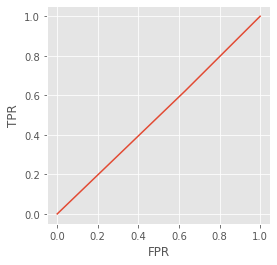

Dummy most_frequent
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6198568872987478
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5

** TESTING PERFORMANCE
-> Accuracy Score: 0.6174016686531585
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5



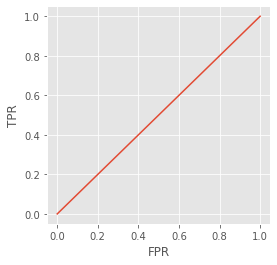

Dummy prior
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6198568872987478
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5

** TESTING PERFORMANCE
-> Accuracy Score: 0.6174016686531585
-> Precision Score: 0.0
-> Recall Score: 0.0
-> F1 Score: 0.0
-> AUC: 0.5



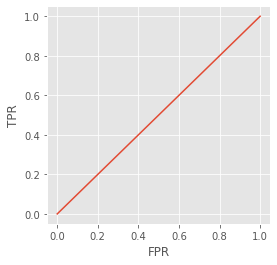

Dummy uniform
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.49672033392963627
-> Precision Score: 0.3722943722943723
-> Recall Score: 0.47215686274509805
-> F1 Score: 0.4163208852005532
-> AUC: 0.5

** TESTING PERFORMANCE
-> Accuracy Score: 0.5005959475566151
-> Precision Score: 0.3799019607843137
-> Recall Score: 0.48286604361370716
-> F1 Score: 0.4252400548696845
-> AUC: 0.5



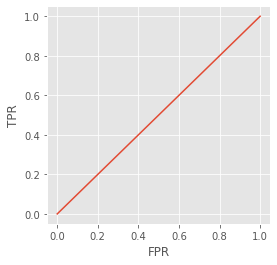

In [182]:
# Baseline (AUC should be 0.5 because we're guessing even though the accuracies are different)
for strategy in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy = DummyClassifier(strategy=strategy,random_state=45)
    dummy.fit(X_train_scaled, y_train)
    performance_model(dummy, 'Dummy {}'.format(strategy), plot=True)

In [71]:
dummy = DummyClassifier()

In [72]:
#Fit and predict the dummy
dummy.fit(X_train_scaled, y_train)
print('TRAIN')
train_preds = dummy.predict(X_train_scaled)
print_metrics(y_train, train_preds)
print('\nTEST')
test_preds = dummy.predict(X_test_scaled)
print_metrics(y_test, test_preds)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

TRAIN
Precision Score: 0.3768352365415987
Recall Score: 0.36492890995260663
Accuracy Score: 0.5324985092426953
F1 Score: 0.37078651685393255

TEST
Precision Score: 0.3502994011976048
Recall Score: 0.35454545454545455
Accuracy Score: 0.48748510131108463
F1 Score: 0.35240963855421686


### LOGISTIC

In [157]:
# #1 fit and predict a logistic regression and show metrics
print('LOGISTIC\n')
print('-'*30)

logr = LogisticRegression()
logr.fit(X_train_scaled, y_train)
test_preds = logr.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

pd.DataFrame(confusion)

LOGISTIC

------------------------------

True Positives: 470
True Negatives: 64
False Positives: 257
False Negatives: 48


,0,1
0,64,257
1,48,470


Logistic
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6359570661896243
-> Precision Score: 0.5576923076923077
-> Recall Score: 0.20470588235294118
-> F1 Score: 0.29948364888123924
-> AUC: 0.6298371200331985

** TESTING PERFORMANCE
-> Accuracy Score: 0.636471990464839
-> Precision Score: 0.5714285714285714
-> Recall Score: 0.19937694704049844
-> F1 Score: 0.2956120092378753
-> AUC: 0.5849962111644356



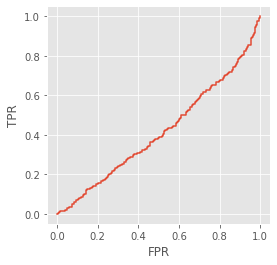

In [158]:
performance_model(logr, 'Logistic', plot=True)

### KNN

In [164]:
# #2 K Nearest Neighbors with all features
print('First K Nearest Neighbors')
print('--'*30)
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
test_preds=knn.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)
pd.DataFrame(confusion)

First K Nearest Neighbors
------------------------------------------------------------

True Positives: 396
True Negatives: 86
False Positives: 235
False Negatives: 122


,0,1
0,86,235
1,122,396


K-NN
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.7197376267143709
-> Precision Score: 0.6772486772486772
-> Recall Score: 0.5019607843137255
-> F1 Score: 0.5765765765765766
-> AUC: 0.7714185741636722

** TESTING PERFORMANCE
-> Accuracy Score: 0.5744934445768772
-> Precision Score: 0.41346153846153844
-> Recall Score: 0.26791277258566976
-> F1 Score: 0.32514177693761814
-> AUC: 0.5212385282478741



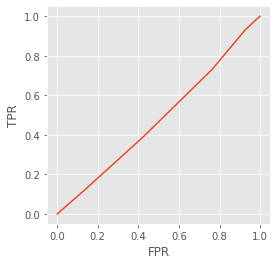

In [165]:
performance_model(knn,'K-NN',plot=True)

In [161]:
#try different values for k and return the model with the highest f1
def find_best_k(X_train, y_train, X_test, y_test, min_k=5, max_k=32):
    best_k = 0
    best_score = 0.0
    for k in range(min_k,max_k+1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    print("Accuracy: {}".format(accuracy_score(y_test, preds)))

In [162]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 8
F1-Score: 0.4054054054054054
Accuracy: 0.6221692491060786


In [166]:
# #2 K Nearest Neighbors after tuning
print('First K Nearest Neighbors')
print('-'*30)
knn_t = KNeighborsClassifier(n_neighbors=8)
knn_t.fit(X_train_scaled, y_train)
test_preds = knn_t.predict(X_test_scaled)
confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)
pd.DataFrame(confusion)

First K Nearest Neighbors
------------------------------

True Positives: 367
True Negatives: 120
False Positives: 201
False Negatives: 151


,0,1
0,120,201
1,151,367


K-NN after tuning
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6908169350029815
-> Precision Score: 0.6011904761904762
-> Recall Score: 0.5545098039215687
-> F1 Score: 0.5769073847409221
-> AUC: 0.728708372237784

** TESTING PERFORMANCE
-> Accuracy Score: 0.5804529201430274
-> Precision Score: 0.44280442804428044
-> Recall Score: 0.37383177570093457
-> F1 Score: 0.4054054054054054
-> AUC: 0.5386942349559173



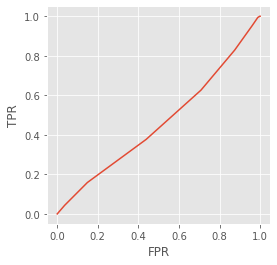

In [167]:
performance_model(knn_t,'K-NN after tuning',plot=True)

### DECISION TREE

In [168]:
#3 Decision Trees (Baseline)
print('DECISION TREE\n')
dtc = DecisionTreeClassifier(random_state=45)
dtc.fit(X_train_scaled, y_train)
test_preds = dtc.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

pd.DataFrame(confusion)

DECISION TREE


True Positives: 312
True Negatives: 134
False Positives: 187
False Negatives: 206


,0,1
0,134,187
1,206,312


Decision Tree
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 1.0
-> Precision Score: 1.0
-> Recall Score: 1.0
-> F1 Score: 1.0
-> AUC: 1.0

** TESTING PERFORMANCE
-> Accuracy Score: 0.531585220500596
-> Precision Score: 0.3941176470588235
-> Recall Score: 0.4174454828660436
-> F1 Score: 0.405446293494705
-> AUC: 0.509881042591323



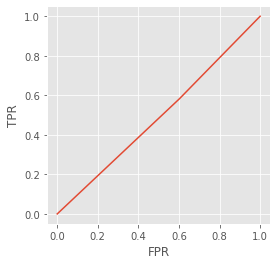

In [169]:
performance_model(dtc,"Decision Tree",plot=True)

#### --> Hyperparameter Tuning

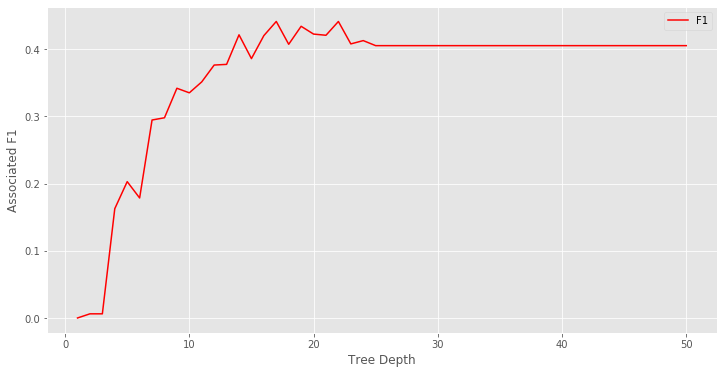

In [170]:
# Find the best tree depth for a depth range: 1-50
plt.style.use('ggplot')

# Identify the optimal tree depth for given data
max_depths = np.linspace(1, 50, 50, endpoint=True)
f1_results = []

for max_depth in max_depths:
    clsf = DecisionTreeClassifier(max_depth=max_depth, random_state=45)
    clsf.fit(X_train_scaled, y_train)
    y_pred = clsf.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    f1_results.append(score)

plt.figure(figsize=(12,6))
plt.plot(max_depths, f1_results, 'r', label='F1')
plt.xlabel('Tree Depth')
plt.ylabel('Associated F1')
plt.legend()
plt.show()

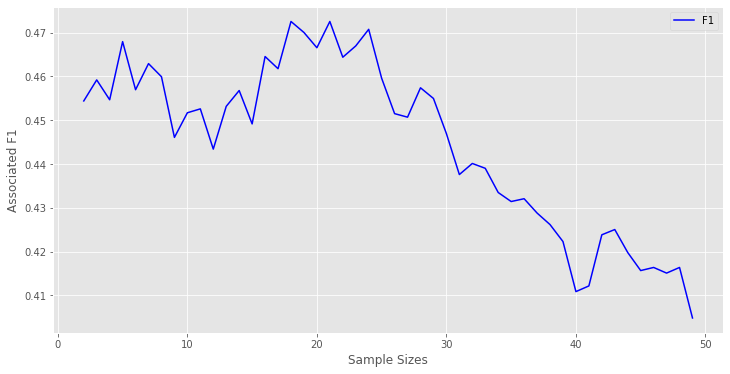

In [102]:
# Find the best min_samples_split
min_samples_splits = np.arange(2,50)
f1_results = []

for min_samples_split in min_samples_splits:
    clsf = DecisionTreeClassifier(min_samples_split=int(min_samples_split), random_state=45)
    clsf.fit(X_train_scaled, y_train)
    y_pred = clsf.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    f1_results.append(score)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, f1_results, 'b', label='F1')
plt.xlabel('Sample Sizes')
plt.ylabel('Associated F1')
plt.legend()
plt.show()

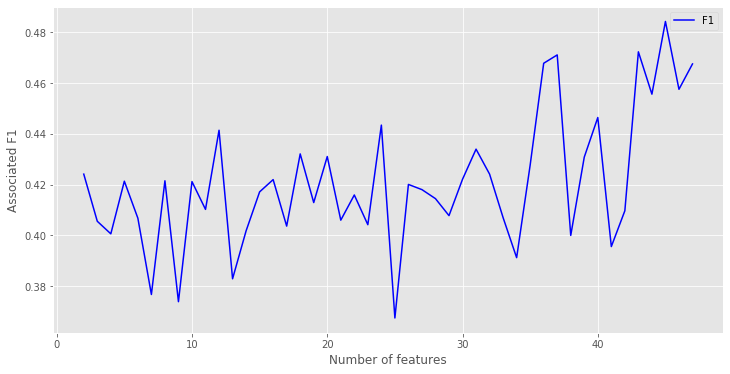

In [103]:
# Find the max_features
max_features = np.arange(2,48)
f1_results = []

for feature in max_features:
    clsf = DecisionTreeClassifier(max_features=int(feature), random_state=45)
    clsf.fit(X_train_scaled, y_train)
    y_pred = clsf.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    f1_results.append(score)

plt.figure(figsize=(12,6))
plt.plot(max_features, f1_results, 'b', label='F1')
plt.xlabel('Number of features')
plt.ylabel('Associated F1')
plt.legend()
plt.show()

In [175]:
print('DECISION TREE')
print('-'*20)
dtc_t = DecisionTreeClassifier(min_samples_split=23, max_depth=20,max_features=46,random_state=45)
dtc_t.fit(X_train_scaled, y_train)
test_preds = dtc_t.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)
pd.DataFrame(confusion)

DECISION TREE
--------------------

True Positives: 319
True Negatives: 126
False Positives: 195
False Negatives: 199


,0,1
0,126,195
1,199,319


Decision Tree after Tuning
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.7886106141920095
-> Precision Score: 0.7235387045813586
-> Recall Score: 0.7184313725490196
-> F1 Score: 0.7209759937032665
-> AUC: 0.8757272067075988

** TESTING PERFORMANCE
-> Accuracy Score: 0.5303933253873659
-> Precision Score: 0.38769230769230767
-> Recall Score: 0.3925233644859813
-> F1 Score: 0.39009287925696595
-> AUC: 0.5135014854641022



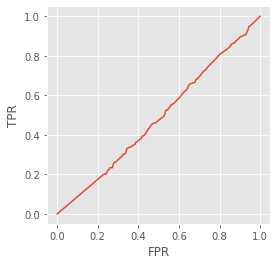

In [176]:
performance_model(dtc,'Decision Tree after Tuning',plot=True)

### RANDOM FOREST

In [177]:
#4 Random Forest first model
print('RANDOM FOREST\n')
# rf = RandomForestClassifier(n_estimators=30, max_depth=20)
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
test_preds = rf.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)
pd.DataFrame(confusion)
print('-'*25)

mean_rf_cv_score = np.mean(cross_val_score(rf, X_train_scaled, y_train, cv=3))

print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

RANDOM FOREST


True Positives: 346
True Negatives: 111
False Positives: 210
False Negatives: 172
-------------------------
Mean Cross Validation Score for Random Forest Classifier: 55.64%


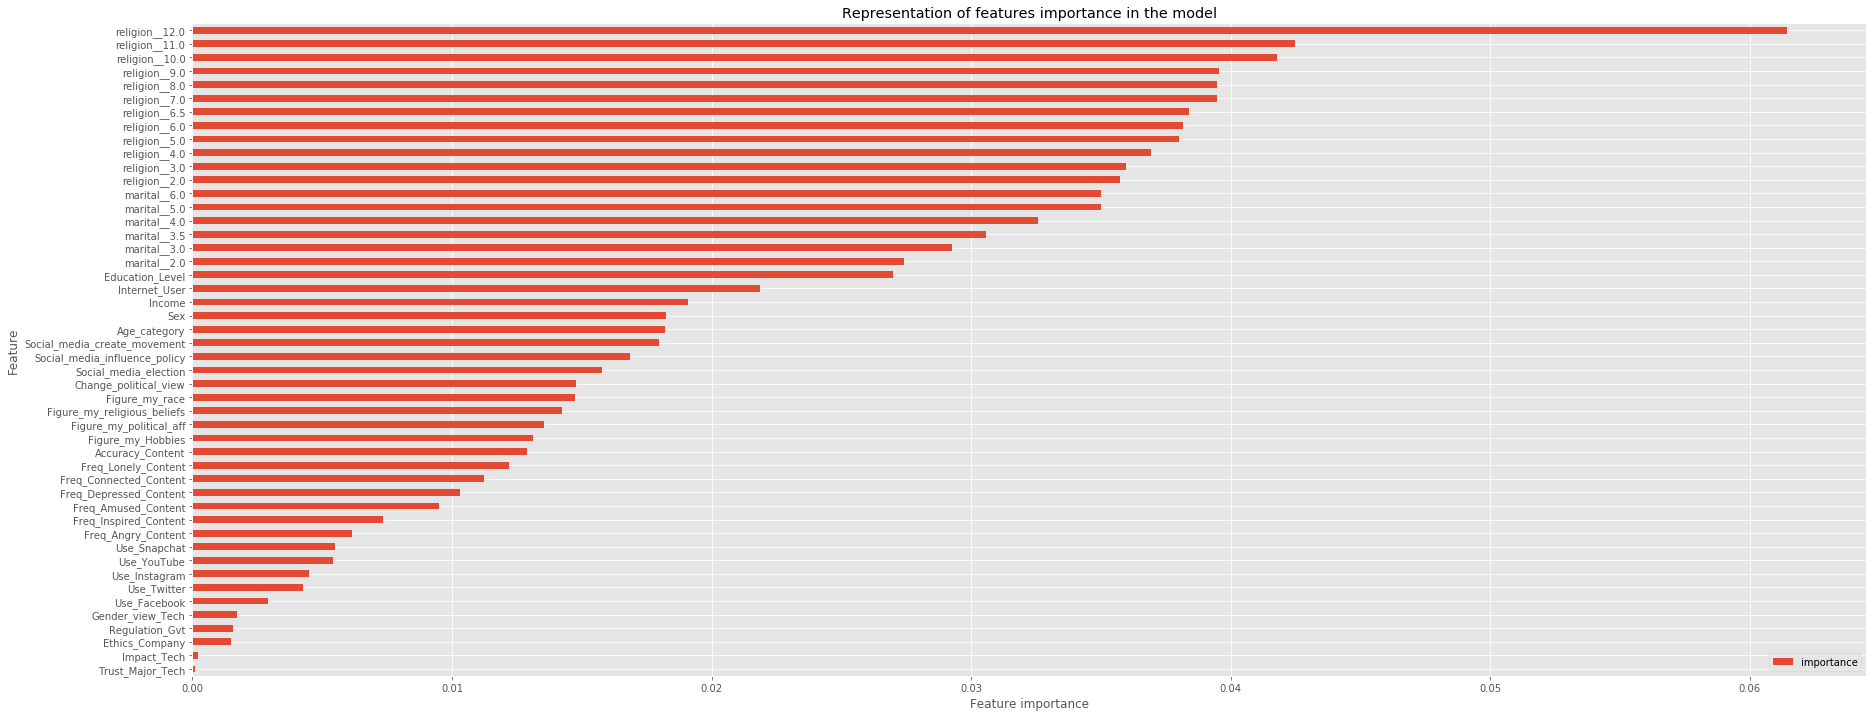

In [178]:
plot_feature_importances(rf)

In [179]:
rf_param_grid = {
    'n_estimators': [10,20,25,30,35,40,45],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10,15,18,20,25,30],
    'min_samples_split': [5,10,15,20,25,30,40],
    'min_samples_leaf': [1, 2, 5,10]
}

In [183]:
import time
start = time.time()
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_scaled, y_train)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

Testing Accuracy: 62.46%
Total Runtime for Grid Search on Random Forest Classifier: 436.6 seconds

Optimal Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 40, 'n_estimators': 30}


In [193]:
#Let's run the optimal model
print('RANDOM FOREST\n')
rf = RandomForestClassifier(n_estimators=30,criterion='gini',min_samples_split=40,min_samples_leaf=5)
rf.fit(X_train_scaled, y_train)
test_preds = rf.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

print('-------------------------------')

mean_rf_cv_score = np.mean(cross_val_score(rf, X_train_scaled, y_train, cv=3))

print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

RANDOM FOREST


True Positives: 499
True Negatives: 27
False Positives: 294
False Negatives: 19
-------------------------------
Mean Cross Validation Score for Random Forest Classifier: 61.99%


Random Forest after tuning
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6929039952295766
-> Precision Score: 0.9152542372881356
-> Recall Score: 0.21176470588235294
-> F1 Score: 0.3439490445859873
-> AUC: 0.847335351649077

** TESTING PERFORMANCE
-> Accuracy Score: 0.6269368295589988
-> Precision Score: 0.5869565217391305
-> Recall Score: 0.08411214953271028
-> F1 Score: 0.14713896457765668
-> AUC: 0.5819410866139838



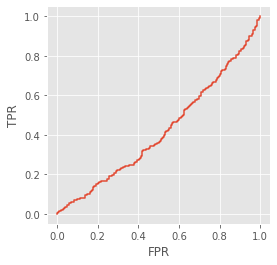

In [194]:
performance_model(rf,'Random Forest after tuning',plot=True)

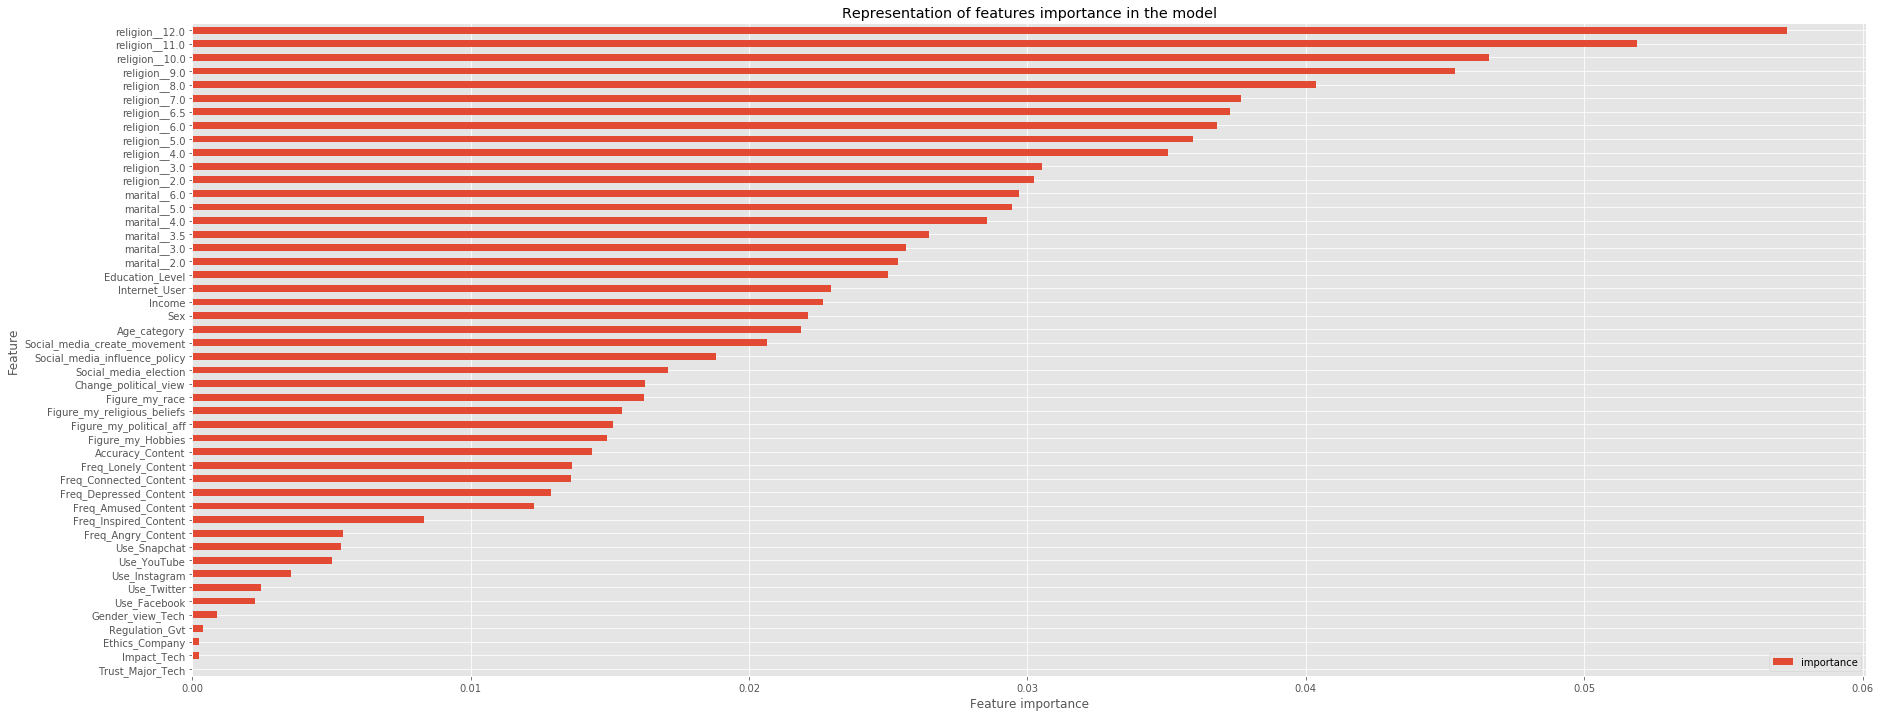

In [195]:
plot_feature_importances(rf)

### ADABOOST

In [196]:
adaboost_clf = AdaBoostClassifier()
adaboost_mean_cv_score = np.mean(cross_val_score(adaboost_clf, X_train_scaled, y_train, cv=5))

print("Mean Cross Validation Score for AdaBoost: {:.4}%".format(adaboost_mean_cv_score * 100))

Mean Cross Validation Score for AdaBoost: 61.15%


In [197]:
adaboost_param_grid = {
    'n_estimators': [10,20,25,30,35,40,45],
    'learning_rate': [1.0, 0.75,0.5, 0.25, 0.1]
}

In [198]:
adaboost_grid_search = GridSearchCV(adaboost_clf, adaboost_param_grid, cv=3)
adaboost_grid_search.fit(X_train_scaled, y_train)

print("Testing Accuracy: {:.4}%".format(adaboost_grid_search.best_score_ * 100))
print("")
print("Optimal Parameters: {}".format(adaboost_grid_search.best_params_))

Testing Accuracy: 62.1%

Optimal Parameters: {'learning_rate': 0.25, 'n_estimators': 25}


In [199]:
#run the model based on the hyperparameter found
adaboost_clf = AdaBoostClassifier(learning_rate=0.25,n_estimators=25)
adaboost_clf.fit(X_train_scaled, y_train)
test_preds=adaboost_clf.predict(X_test_scaled)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

pd.DataFrame(confusion)


True Positives: 517
True Negatives: 8
False Positives: 313
False Negatives: 1


,0,1
0,8,313
1,1,517


Adaboost
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6204531902206321
-> Precision Score: 0.5333333333333333
-> Recall Score: 0.012549019607843137
-> F1 Score: 0.024521072796934863
-> AUC: 0.6135146044949967

** TESTING PERFORMANCE
-> Accuracy Score: 0.6257449344457687
-> Precision Score: 0.8888888888888888
-> Recall Score: 0.024922118380062305
-> F1 Score: 0.048484848484848485
-> AUC: 0.5885384717160418



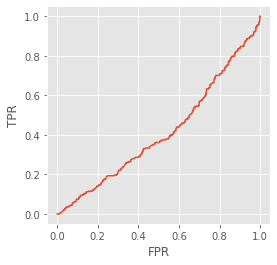

In [200]:
performance_model(adaboost_clf,"Adaboost",plot=True)

### XGBOOST

In [201]:
#Baseline
clf = xgb.XGBClassifier()
clf.fit(X_train_scaled, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test_scaled)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 61.99%
Validation accuracy: 62.81%


In [202]:
#Tuning
param_grid = {
    "learning_rate": [1.0,0.5, 0.1],
    'max_depth': [5,15,20],
    'min_child_weight': [10,15],
    'subsample': [ 0.7],
    'n_estimators': [15, 25, 30, 45],
}

In [203]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train_scaled, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_scaled)
val_preds = grid_clf.predict(X_test_scaled)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 5
min_child_weight: 10
n_estimators: 25
subsample: 0.7

Training Accuracy: 67.53%
Validation accuracy: 62.57%


In [137]:
#Let's run with the optimal parameter
xgb_clf = xgb.XGBClassifier(learning_rate=0.1,max_depth=5,min_child_weight=15,n_estimators=15,subsample=0.7)
xgb_clf.fit(X_train_scaled, y_train)
test_preds = xgb_clf.predict(X_test_scaled)
print('XGBoost')
print('-'*20)

confusion = metrics.confusion_matrix(y_test, test_preds)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

print ('\nTrue Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

pd.DataFrame(confusion)

XGBoost
--------------------

True Positives: 471
True Negatives: 34
False Positives: 296
False Negatives: 38


,0,1
0,34,296
1,38,471


XGBoost after tuning
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.6630888491353608
-> Precision Score: 0.7361111111111112
-> Recall Score: 0.1674565560821485
-> F1 Score: 0.2728442728442728
-> AUC: 0.6983358225442308

** TESTING PERFORMANCE
-> Accuracy Score: 0.601907032181168
-> Precision Score: 0.4722222222222222
-> Recall Score: 0.10303030303030303
-> F1 Score: 0.16915422885572137
-> AUC: 0.5683336310055367



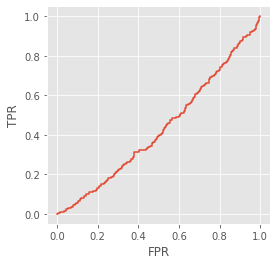

In [138]:
performance_model(xgb_clf,"XGBoost after tuning",plot=True)

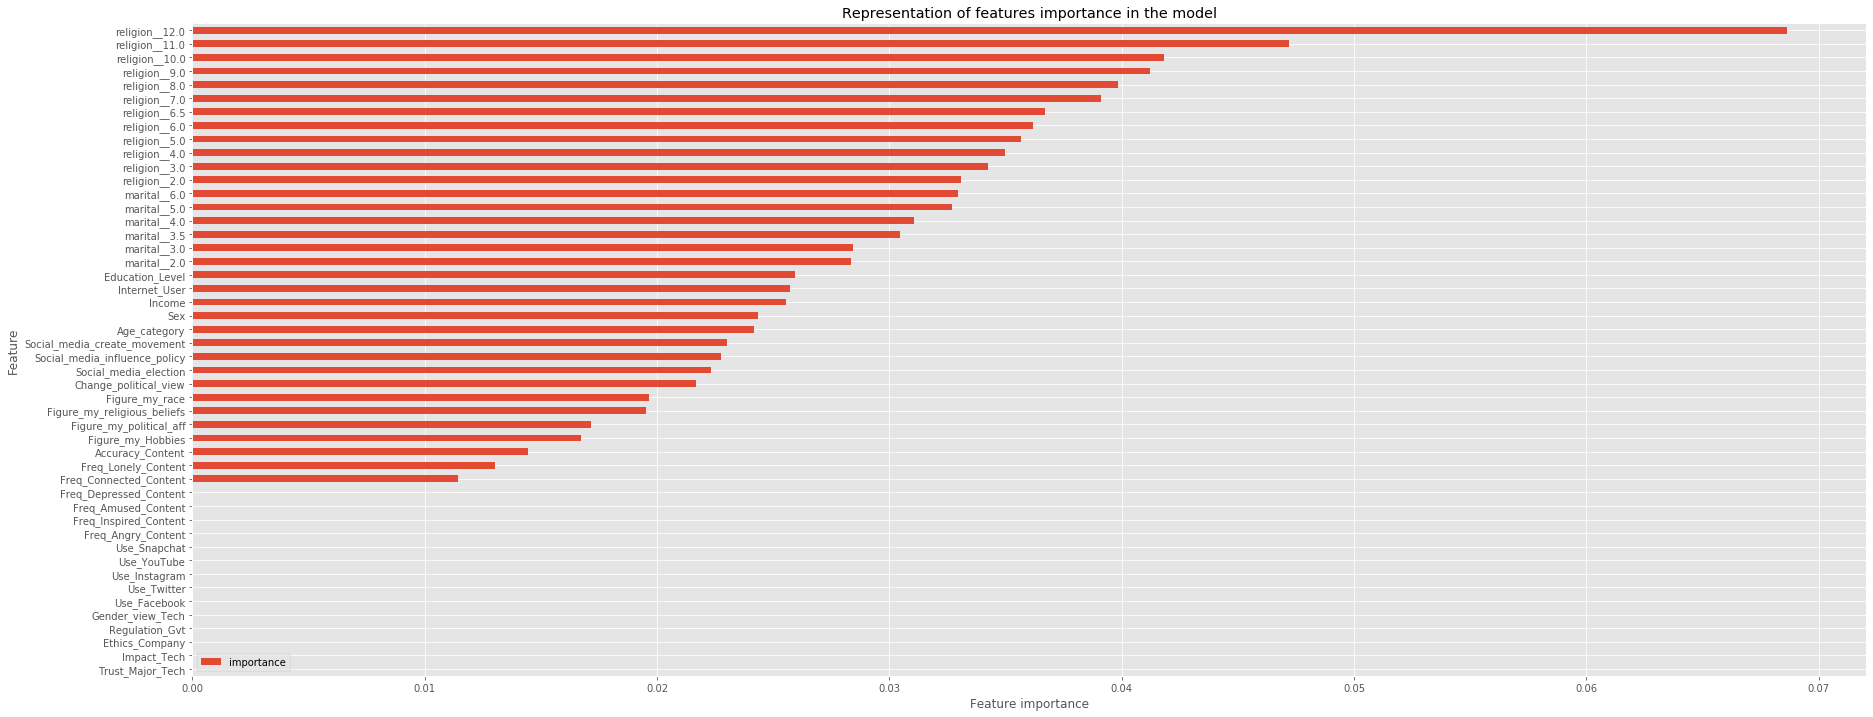

In [139]:
plot_feature_importances(xgb_clf)